# Proyecto Final Inteligencia Artificial I E1
# Predicción del precio del bitcoin (DATOS DESDE 2017 HASTA 2023)


*   Pardo Alquichire Andrés Joan
*   Pardo Maldonado Miguel Fernando
*   Jhon Danilo Rincón Maldonado


In [1]:
from google.colab import drive

# Montar Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Cargar el conjunto de datos
file_path = '/content/drive/MyDrive/inteligenciaArtificial1/proyectoIA/bitcoin_2017_to_2023.csv'
data = pd.read_csv(file_path)
data['timestamp'] = pd.to_datetime(data['timestamp'])

# Agrupar por hora y calcular el promedio
data_hourly = data.resample('H', on='timestamp').mean()

# Seleccionar la variable de interés (por ejemplo, 'close')
series_hourly = data_hourly['close'].values

# Imprimir los primeros valores después de la conversión
print(series_hourly[:10])

[4282.62516667 4313.30566667 4327.27633333 4311.038      4360.37533333
 4398.64983333 4428.90633333 4468.38583333 4428.08433333 4439.31233333]


In [3]:
import numpy as np

# Definir el nuevo tamaño de la ventana en horas
window_size_hours = 5  # Puedes ajustar este valor según tus necesidades

# Aplicar el método de la ventana deslizante con manejo de NaN
def generate_sliding_windows(data, window_size):
    windows = []
    targets = []
    for i in range(len(data) - window_size):
        window = data[i:i + window_size]
        target = data[i + window_size]

        # Verificar si hay NaN en la ventana o el objetivo
        if not np.isnan(window).any() and not np.isnan(target):
            windows.append(window)
            targets.append(target)

    # Convertir las listas a arrays
    windows = np.array(windows)
    targets = np.array(targets)

    # Eliminar filas que contienen NaN
    non_nan_indices = ~np.isnan(targets)
    windows = windows[non_nan_indices]
    targets = targets[non_nan_indices]

    return windows, targets

# Generar ventanas y objetivos sin NaN
X_hours, y_hours = generate_sliding_windows(series_hourly, window_size_hours)

# Imprimir más conjuntos de datos generados
num_samples_to_print = 10  # Puedes ajustar este valor según cuántos conjuntos de datos quieres imprimir

for i in range(num_samples_to_print):
    print(f'\nConjunto de Datos #{i + 1}:')
    print('Ventana:')
    print(X_hours[i])
    print('Objetivo:')
    print(y_hours[i])



Conjunto de Datos #1:
Ventana:
[4282.62516667 4313.30566667 4327.27633333 4311.038      4360.37533333]
Objetivo:
4398.649833333333

Conjunto de Datos #2:
Ventana:
[4313.30566667 4327.27633333 4311.038      4360.37533333 4398.64983333]
Objetivo:
4428.906333333333

Conjunto de Datos #3:
Ventana:
[4327.27633333 4311.038      4360.37533333 4398.64983333 4428.90633333]
Objetivo:
4468.385833333334

Conjunto de Datos #4:
Ventana:
[4311.038      4360.37533333 4398.64983333 4428.90633333 4468.38583333]
Objetivo:
4428.084333333333

Conjunto de Datos #5:
Ventana:
[4360.37533333 4398.64983333 4428.90633333 4468.38583333 4428.08433333]
Objetivo:
4439.312333333333

Conjunto de Datos #6:
Ventana:
[4398.64983333 4428.90633333 4468.38583333 4428.08433333 4439.31233333]
Objetivo:
4468.498166666667

Conjunto de Datos #7:
Ventana:
[4428.90633333 4468.38583333 4428.08433333 4439.31233333 4468.49816667]
Objetivo:
4427.669

Conjunto de Datos #8:
Ventana:
[4468.38583333 4428.08433333 4439.31233333 4468.49816

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Generar ventanas y objetivos sin NaN
X_hours, y_hours = generate_sliding_windows(series_hourly, window_size_hours)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_hours, y_hours, test_size=0.2, random_state=42)

# Crear el modelo de Random Forest
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
random_forest.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = random_forest.predict(X_test)

# Calcular MSE y MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Imprimir los resultados
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 31745.38353850033
Mean Absolute Error (MAE): 91.66080539787393


In [5]:
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error


# Generar ventanas y objetivos sin NaN
X_hours, y_hours = generate_sliding_windows(series_hourly, window_size_hours)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_hours, y_hours, test_size=0.2, random_state=42)

# Crear el modelo de Decision Tree
decision_tree = DecisionTreeRegressor(random_state=42)

# Entrenar el modelo
decision_tree.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
predictions = decision_tree.predict(X_test)

# Calcular MSE y MAE
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

# Imprimir los resultados
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')


Mean Squared Error (MSE): 57102.11603506501
Mean Absolute Error (MAE): 124.99466487973257


In [6]:
# prompt: dnn de keras con los valores objetivo (series_hourly, window_size_hours)

# Importar las librerías necesarias
import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

# Generar ventanas y objetivos sin NaN
X_hours, y_hours = generate_sliding_windows(series_hourly, window_size_hours)

# Crear el modelo DNN
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(window_size_hours, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
model.evaluate(X_test, y_test)

# Guardar el modelo
model.save('my_model.h5')


Epoch 1/10
2597/2597 [==============================] - 15s 5ms/step - loss: 46264080.0000
Epoch 2/10
2597/2597 [==============================] - 14s 6ms/step - loss: 21067212.0000
Epoch 3/10
2597/2597 [==============================] - 15s 6ms/step - loss: 20555860.0000
Epoch 4/10
2597/2597 [==============================] - 14s 5ms/step - loss: 20916586.0000
Epoch 5/10
2597/2597 [==============================] - 14s 5ms/step - loss: 20497172.0000
Epoch 6/10
2597/2597 [==============================] - 13s 5ms/step - loss: 20150738.0000
Epoch 7/10
2597/2597 [==============================] - 13s 5ms/step - loss: 20807080.0000
Epoch 8/10
2597/2597 [==============================] - 14s 5ms/step - loss: 20666054.0000
Epoch 9/10
2597/2597 [==============================] - 14s 5ms/step - loss: 20578668.0000
Epoch 10/10
325/325 [==============================] - 2s 3ms/step - loss: 290494.5938


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [7]:

from sklearn.metrics import r2_score

# Generar ventanas y objetivos sin NaN
X_hours, y_hours = generate_sliding_windows(series_hourly, window_size_hours)

# Crear el modelo DNN
model = Sequential()
model.add(LSTM(units=64, activation='relu', input_shape=(window_size_hours, 1)))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Evaluar el modelo
model.evaluate(X_test, y_test)

# Guardar el modelo
model.save('my_model.h5')


# Cargar el modelo
model = keras.models.load_model('my_model.h5')

# Hacer predicciones
predictions = model.predict(X_test)

# Calcular el MSE, MAE y R^2
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Imprimir las métricas
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R^2 Score: {r2}')


Epoch 1/10
2597/2597 [==============================] - 29s 10ms/step - loss: 23452172.0000
Epoch 2/10
2597/2597 [==============================] - 29s 11ms/step - loss: 14178647.0000
Epoch 3/10
2597/2597 [==============================] - 15s 6ms/step - loss: 14172090.0000
Epoch 4/10
2597/2597 [==============================] - 14s 6ms/step - loss: 14067270.0000
Epoch 5/10
2597/2597 [==============================] - 14s 5ms/step - loss: 14063539.0000
Epoch 6/10
2597/2597 [==============================] - 14s 5ms/step - loss: 13806518.0000
Epoch 7/10
2597/2597 [==============================] - 15s 6ms/step - loss: 13961424.0000
Epoch 8/10
2597/2597 [==============================] - 15s 6ms/step - loss: 13973875.0000
Epoch 9/10
2597/2597 [==============================] - 15s 6ms/step - loss: 13955731.0000
Epoch 10/10
325/325 [==============================] - 1s 2ms/step
Mean Squared Error (MSE): 1036357.385871001
Mean Absolute Error (MAE): 771.6922886867143
R^2 Score: 0.9960711198

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


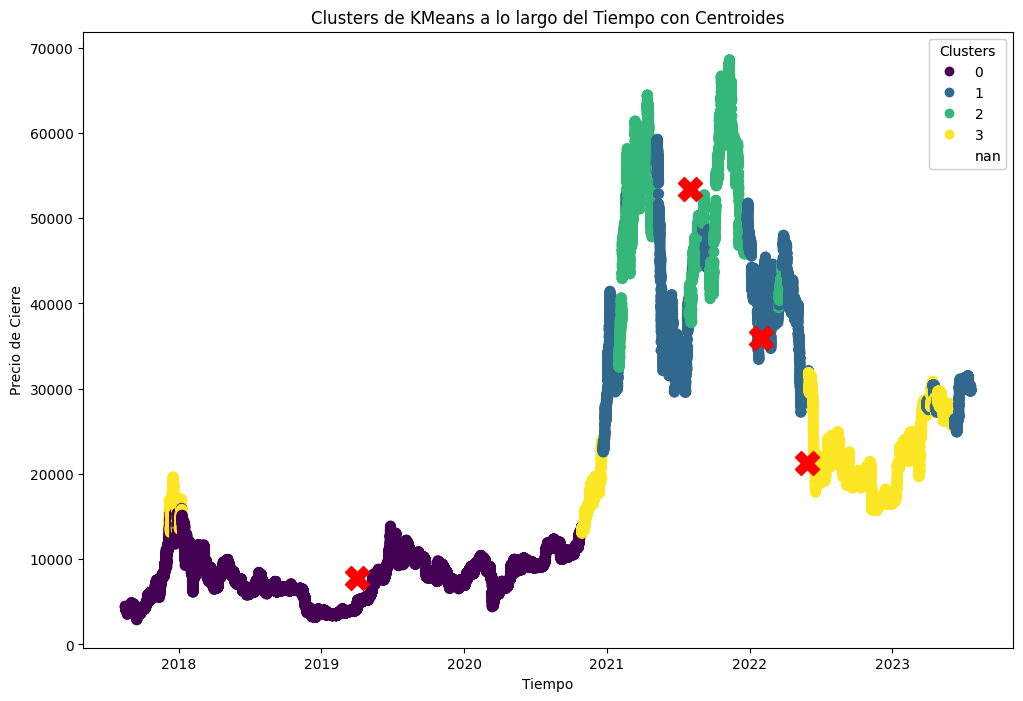

In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cargar el conjunto de datos y procesar los datos
file_path = '/content/drive/MyDrive/inteligenciaArtificial1/proyectoIA/bitcoin_2017_to_2023.csv'
data = pd.read_csv(file_path)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data_hourly = data.resample('H', on='timestamp').mean()
series_hourly = data_hourly['close'].values

# Definir el nuevo tamaño de la ventana en horas
window_size_hours = 5
X_hours, y_hours = generate_sliding_windows(series_hourly, window_size_hours)

# Aplicar KMeans con el número óptimo de clusters
kmeans_optimal = KMeans(n_clusters=4, random_state=42)
kmeans_optimal.fit(X_hours)

# Ajustar las longitudes después de KMeans
labels = kmeans_optimal.labels_
data_hourly = data_hourly.iloc[:len(labels) + window_size_hours]  # Ajustar la longitud de data_hourly
series_hourly = series_hourly[:len(labels) + window_size_hours]  # Ajustar la longitud de series_hourly

# Obtener las marcas de tiempo de los centroides
centroids_timestamps = []
for centroid_label in range(4):  # Ajusta esto al número real de clusters
    centroid_indices = np.where(labels == centroid_label)[0]
    centroid_timestamp = data_hourly.index[window_size_hours + centroid_indices].mean()
    centroids_timestamps.append(centroid_timestamp)

# Crear un gráfico de dispersión con colores basados en los clusters de KMeans
plt.figure(figsize=(12, 8))
scatter = plt.scatter(data_hourly.index[window_size_hours:], series_hourly[window_size_hours:], c=labels, cmap='viridis', s=50)

# Mostrar los centroides en el gráfico
centroids = kmeans_optimal.cluster_centers_
plt.scatter(centroids_timestamps, centroids[:, 1], c='red', marker='X', s=300, label='Centroides')

# Agregar leyenda para los clusters y centroides
legend1 = plt.legend(*scatter.legend_elements(), title='Clusters')
plt.gca().add_artist(legend1)

# Configurar ejes y etiquetas
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.title('Clusters de KMeans a lo largo del Tiempo con Centroides')

# Mostrar el gráfico
plt.show()


<__array_function__ internals>:180: UserWarning: Warning: converting a masked element to nan.
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:1311: UserWarning: Warning: converting a masked element to nan.
  data = np.asarray(value)
/usr/local/lib/python3.10/dist-packages/matplotlib/ticker.py:521: UserWarning: Warning: converting a masked element to nan.
  if self._useLocale else fmt % arg)


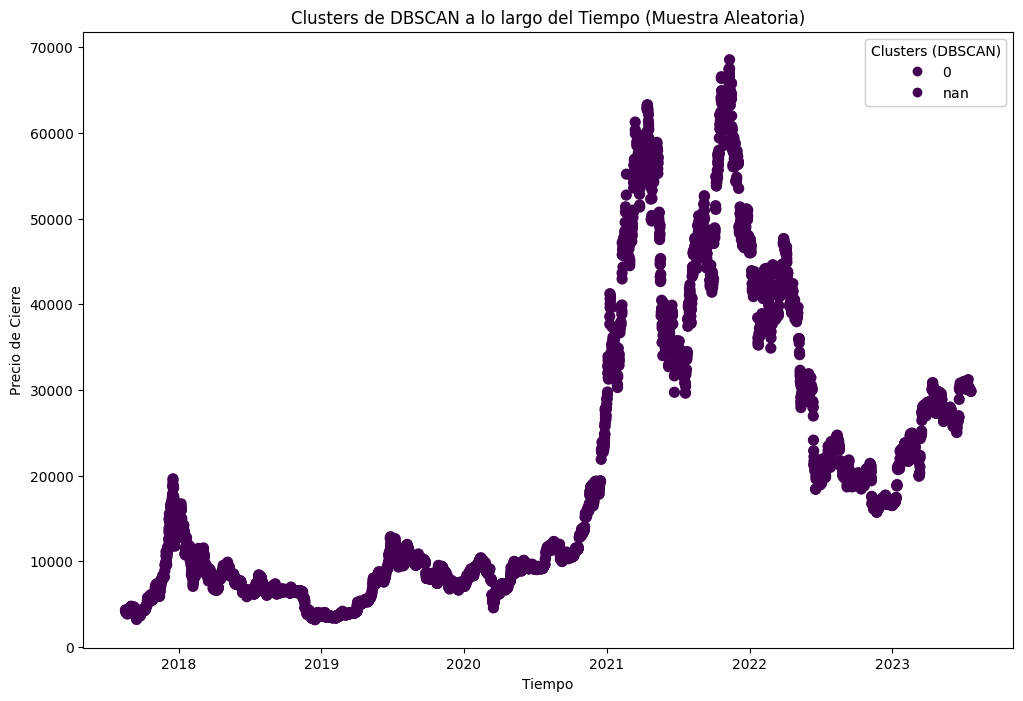

In [9]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

# Obtener una muestra aleatoria de los datos
sample_size = 5000  # Ajusta el tamaño de la muestra según tus necesidades
random_indices = np.random.choice(len(X_hours), size=sample_size, replace=False)
X_sample = X_hours[random_indices]

# Escalar los datos para DBSCAN (sensible a la escala)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sample)

# Ajustar los parámetros de DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)  # Ajusta estos valores según tus datos
labels_dbscan = dbscan.fit_predict(X_scaled)

# Crear un gráfico de dispersión con colores basados en los clusters de DBSCAN
plt.figure(figsize=(12, 8))
scatter_dbscan = plt.scatter(data_hourly.index[window_size_hours:][random_indices],
                              series_hourly[window_size_hours:][random_indices],
                              c=labels_dbscan, cmap='viridis', s=50)

# Agregar leyenda para los clusters de DBSCAN
legend_dbscan = plt.legend(*scatter_dbscan.legend_elements(), title='Clusters (DBSCAN)')
plt.gca().add_artist(legend_dbscan)

# Configurar ejes y etiquetas
plt.xlabel('Tiempo')
plt.ylabel('Precio de Cierre')
plt.title('Clusters de DBSCAN a lo largo del Tiempo (Muestra Aleatoria)')

# Mostrar el gráfico
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

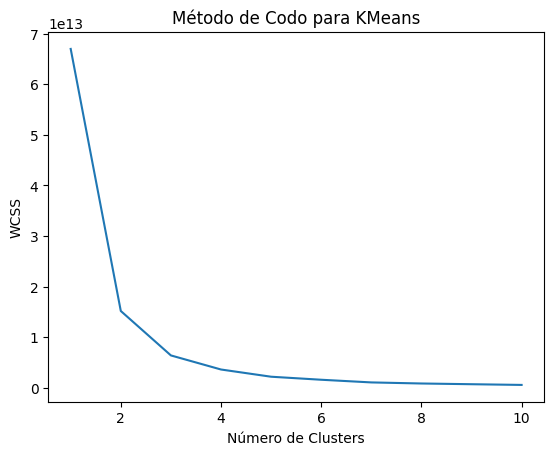

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


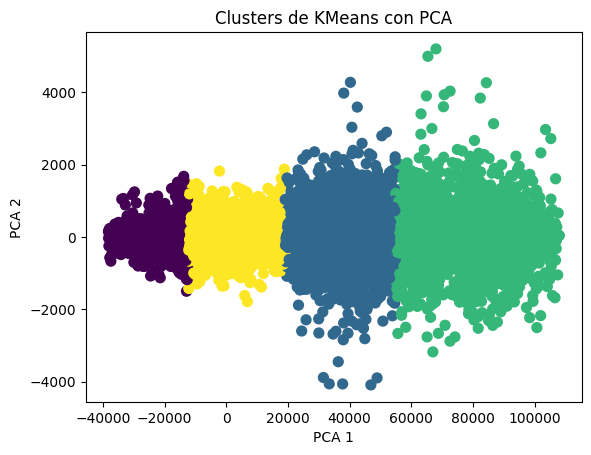

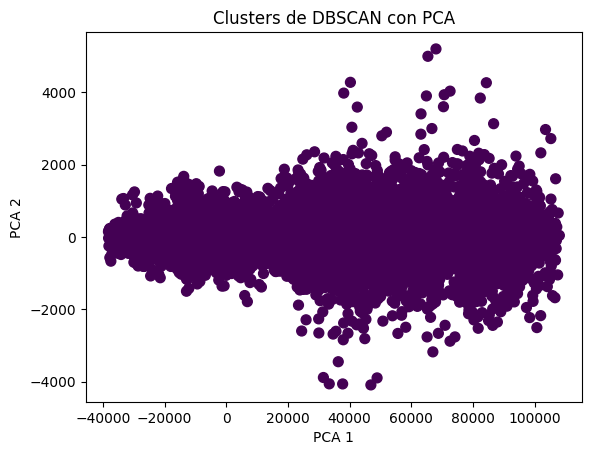

In [10]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Método de codo (elbow) para encontrar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_hours)
    wcss.append(kmeans.inertia_)

# Graficar el método de codo
plt.plot(range(1, 11), wcss)
plt.title('Método de Codo para KMeans')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')  # Within-Cluster Sum of Squares
plt.show()

# Aplicar PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_hours)

# KMeans con el número óptimo de clusters encontrado en el método de codo
optimal_k = 4  # Ajustar según el resultado del método de codo
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# Graficar clusters de KMeans usando PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('Clusters de KMeans con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

# DBSCAN con PCA
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_pca)

# Graficar clusters de DBSCAN usando PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis', s=50)
plt.title('Clusters de DBSCAN con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


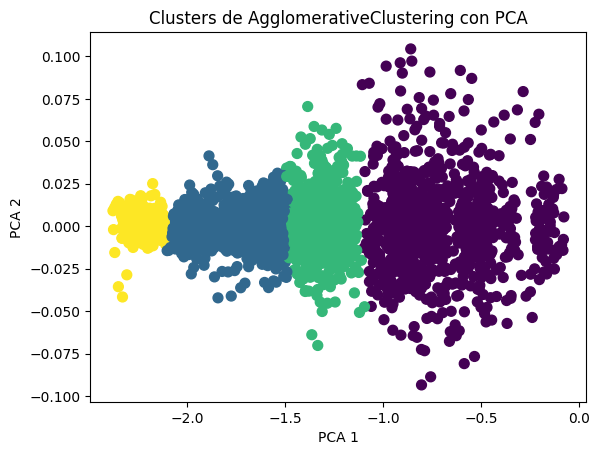

In [12]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Normalizar los datos antes de aplicar PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_hours)

# Reducir la dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Reducir la cantidad de datos para aliviar la carga en la memoria
sample_size = 5000
X_sampled = X_pca[:sample_size]

# Aplicar AgglomerativeClustering
agglomerative = AgglomerativeClustering(n_clusters=optimal_k, affinity='euclidean', linkage='ward')
agglomerative_labels = agglomerative.fit_predict(X_sampled)

# Graficar clusters de AgglomerativeClustering usando PCA
plt.scatter(X_sampled[:, 0], X_sampled[:, 1], c=agglomerative_labels, cmap='viridis', s=50)
plt.title('Clusters de AgglomerativeClustering con PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


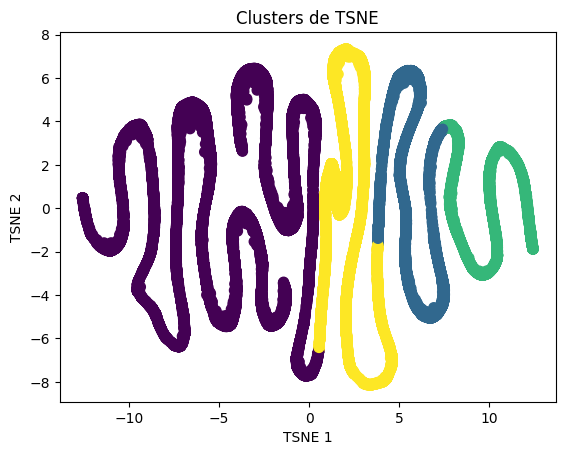

In [17]:
from sklearn.manifold import TSNE

# Aplicar TSNE a los datos con menos iteraciones
tsne = TSNE(n_components=2, random_state=42, n_iter=250)
X_tsne = tsne.fit_transform(X_hours)

# Graficar clusters de TSNE
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels[:X_tsne.shape[0]], cmap='viridis', s=50)
plt.title('Clusters de TSNE')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


# Reducción de dimensionalidad con PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_hours)

# Reducción de dimensionalidad con t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_hours)


In [ ]:
# Visualización con PCA
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_hours, cmap='viridis', s=50)
plt.title('Reducción de Dimensionalidad con PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')

# Visualización con t-SNE
plt.subplot(1, 2, 2)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_hours, cmap='viridis', s=50)
plt.title('Reducción de Dimensionalidad con t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

plt.tight_layout()
plt.show()
